# Support Vector Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading Dataset

In [ ]:
df = pd.read_csv('car.csv')

Split Data to x and y

In [ ]:
df = pd.read_csv("car.csv")
x = df.iloc[:, :-1].values
y = df.iloc[: , -1].values
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Ford,2013,110000,Petrol,Individual,Manual,First Owner,18.5,1197.0,82.85,5.0
8124,Nissan,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493.0,110.0,5.0
8125,BMW,2009,120000,Diesel,Individual,Manual,First Owner,19.3,1248.0,73.9,5.0
8126,Ford,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.0,5.0


In [ ]:
print(x.shape)


(8128, 11)


In [ ]:
df.info()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
imputer.fit(x[ : , 7:11])
x[:, 7:11] = imputer.transform(x[:, 7:11])
pd.DataFrame(x[ 0:17 , 7:11])

,0,1,2,3
0,23.4,1248.0,74.0,5.0
1,21.14,1498.0,103.52,5.0
2,17.7,1497.0,78.0,5.0
3,23.0,1396.0,90.0,5.0
4,16.1,1298.0,88.2,5.0
5,20.14,1197.0,81.86,5.0
6,17.3,1061.0,57.5,5.0
7,16.1,796.0,37.0,4.0
8,23.59,1364.0,67.1,5.0
9,20.0,1399.0,68.1,5.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,3,4,5,6])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014,145500,23.4,1248.0,74.0,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2014,120000,21.14,1498.0,103.52,5.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2006,140000,17.7,1497.0,78.0,5.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010,127000,23.0,1396.0,90.0,5.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2007,120000,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2013,110000,18.5,1197.0,82.85,5.0
8124,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2007,119000,16.8,1493.0,110.0,5.0
8125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2009,120000,19.3,1248.0,73.9,5.0
8126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013,25000,23.57,1396.0,70.0,5.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
print("Trainig Data..")
print("The shape of training features: ", x_train.shape)
print("The shape of training labels: ", y_train.shape)

Trainig Data..
The shape of training features:  (5689, 25)
The shape of training labels:  (5689,)


In [ ]:
print("Trainig Data..")
print("The shape of testing features: ", x_test.shape)
print("The shape of testing labels: ", y_test.shape)

Trainig Data..
The shape of testing features:  (2439, 25)
The shape of testing labels:  (2439,)


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_X.fit_transform(x_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))


In [ ]:
# Training the SVR model
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(x_train_scaled, y_train_scaled.ravel())

SVR()

In [ ]:
# Making predictions
X_test_scaled = sc_X.transform(x_test)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_pred


array([[ 212724.68272479],
       [1357393.56988235],
       [ 865645.38936175],
       ...,
       [ 235755.46679495],
       [ 409965.57512069],
       [1551931.52850565]])

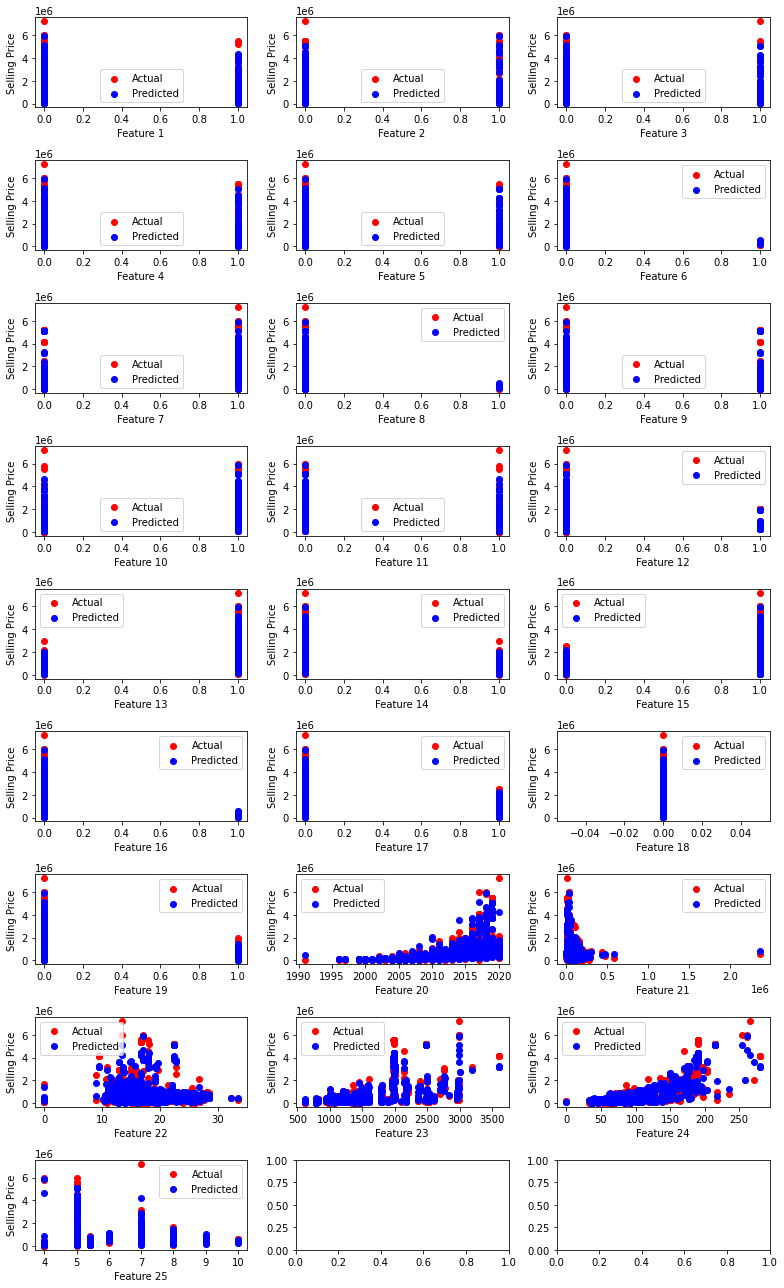

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of rows needed based on the number of features
num_rows = (x_test.shape[1] + 2) // 3  # Ceiling division

# Create subplots grid
fig, axs = plt.subplots(num_rows, 3, figsize=(11, 2*num_rows))

for i in range(x_test.shape[1]):
    x = x_test[:, i]
    
    # Calculate subplot position
    row_idx = i // 3
    col_idx = i % 3
    
    # Scatter plot for y_test
    axs[row_idx, col_idx].scatter(x, y_test, color='red', label='Actual')
    
    # Scatter plot for y_pred
    axs[row_idx, col_idx].scatter(x, y_pred, color='blue', label='Predicted')
    # Set title for each subplot
    # Add legend
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_xlabel(f'Feature {i+1}')
    axs[row_idx, col_idx].set_ylabel('Selling Price')

# Adjust layout
plt.tight_layout()
plt.show()